In [1]:
import os
import tarfile
from six.moves import urllib     # six is a package used for compatibility between python 2 and 3

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as file:
        file.extractall(housing_path)

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# The Data

Each row represents one distric

In [3]:
housing = load_housing_data(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


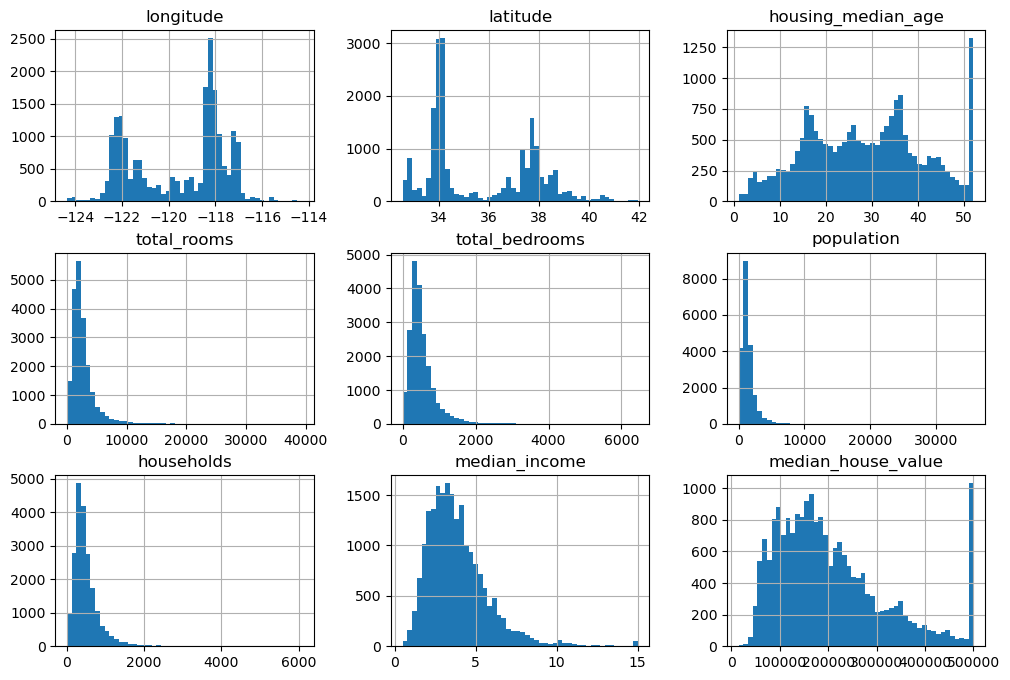

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))
plt.show()

1. `housing_meadian_age`: There's a high amount of houses with 52 ages, meaning that 52 maybe is being used meaning 52+, or this derives from a geographical / historical fact. 
		* `meadian_house_value` Also has a peak there, which indicates some relation between those values and the 52 age house (for any of the above factors or not)
	2. `meadian_income` X axis doesn't correspond directly to any currency.
		
	3. ⭐ The attributes have very different scales
		
	4. ⭐ The histograms are very asymmetrical (which can be harder for ML algorithms)
		
	5. There's a clear relation between the graphs `total_rooms`, `total_bedrooms`, `population` and `households`
		* Besides, each of these can be clearly related to the `median_income`


	*New Information*:
	1. `meadian_income` Has been scaled and capped at 15 (max median income) and 0.5 (min median income). The numbers represent roughly ten of thousands of dollars (3 → $30,000)
	2. `house_median_age` and `house_meadian_value` were also capped - as suspected


# 🔵 Splitting the Data 

## Purely Random Way

In [8]:
import numpy as np

def split_train_test(data, test_ratio, seed=42):
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


## Update Safe Way

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


## 🔷 Stratified Sampling

<AxesSubplot:>

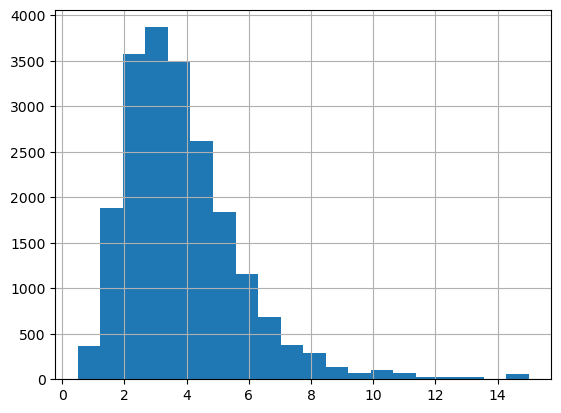

In [11]:
housing.median_income.hist(bins=20)

Notice that most of the values are compreehended between 1.5 and 6 (meadian salary). Thus, let's make some strata like so:

Suppose that, to this problem, the **median income** is a very important attribute to predict median housing princes. Thus, let's use stratified sampling to ensure that every category is represented in the sample.

1. To make a stratified sampling first, you'll need a categorical attribute to stratify by - if it doesn't exist, create it. 

> The example below creates an income category to divide the median income attribute in different stratum, ranging from 1 to 5. 

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                              labels = [1, 2, 3, 4, 5])
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


<AxesSubplot:>

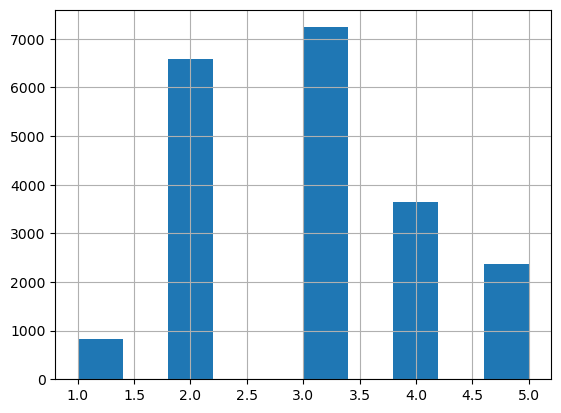

In [13]:
housing["income_cat"].hist()

Now we need just to ensure that each strata is accurately represented in the sample.

2. **Random Sampling**
Now we must apply a random sampling to each stratum, maintaining the proportion of the amount of entries in that stratum.

To do this, we can use Scikit-learn's `StratifiedShuffleSplit:

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [15]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

`StratifiedShuffleSplit` Returns an object that can generate indices that will be used to split the train and test set. To generate the indices, use the `.split()` method. 

After the stratification split is done, you should delete the categorical column created for that sole purpose.

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 🔵 Visualizing the Data

Now is the part where we'll explore the dataset, discover its characteristics to decide what would be the best ML algorithm to use.

Use a **copy** of the training set to explore the data.
* If the training set is too big, use an exploratory set, a smaller sample of the training set. 

In [17]:
housing = strat_train_set.copy()

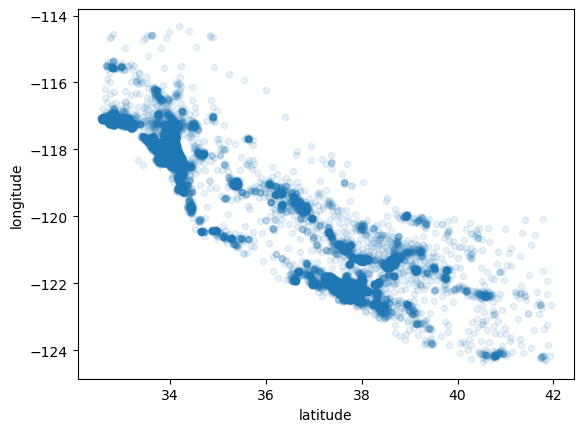

In [18]:
housing.plot(kind="scatter", x="latitude", y="longitude", alpha=0.1);

In [19]:
import seaborn as sns

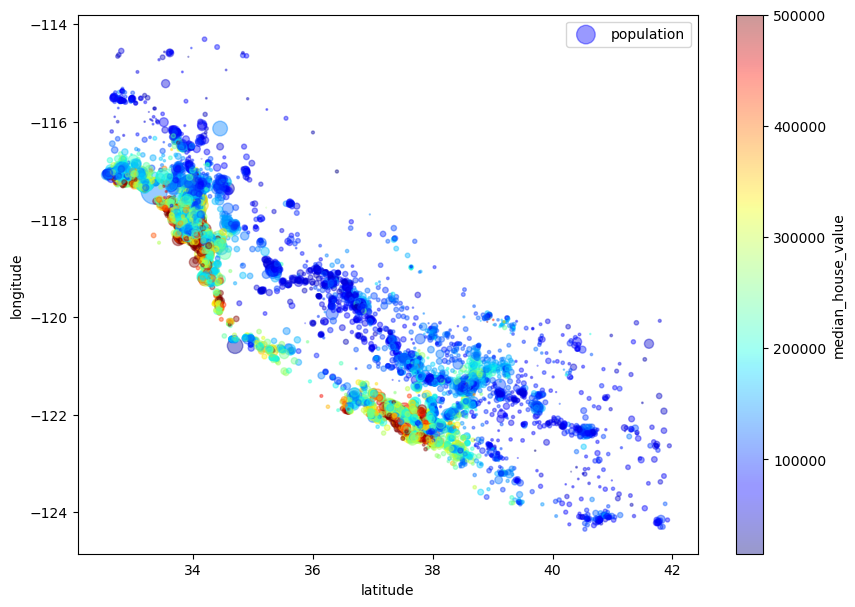

In [20]:
housing.plot(kind="scatter", x="latitude", y="longitude",
	alpha = 0.4, s=housing["population"]/100, c="median_house_value", cmap=plt.get_cmap("jet"),
            colorbar=True, figsize=(10, 7), label="population");
plt.legend();

Plotting over California's map

In [22]:
# Download California image

image_path = os.path.join("datasets", "images", "end_to_end_project")
os.makedirs(image_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
IMAGE_URL = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(IMAGE_URL, os.path.join(image_path, filename))

('datasets\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x23a79d4ffd0>)

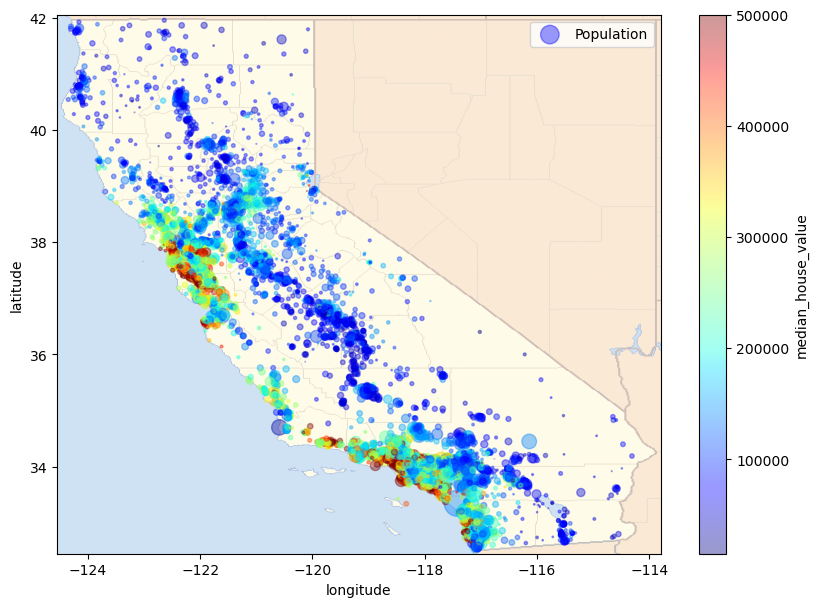

In [23]:
# Inserting the image
import matplotlib.image as mpimg

california_img = mpimg.imread(os.path.join(image_path, filename))

housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=True, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))
plt.show()

# 🔵 Correlations

## 🔷 Pearson's Correlations

Also called standard correlation coefficient can be used **when the dataset is not too big**. It ranges from -1 to 1, where
* 1 indicates total **linear** correlation (one ↑ other ↑)
* -1 indicates total opposite **linear** correlation (one ↑ other ↓)
* 0 indicates no **linear** correlation

❗ Pearson's correlation doesn't indicate non-linear correlations, like in the third row below:
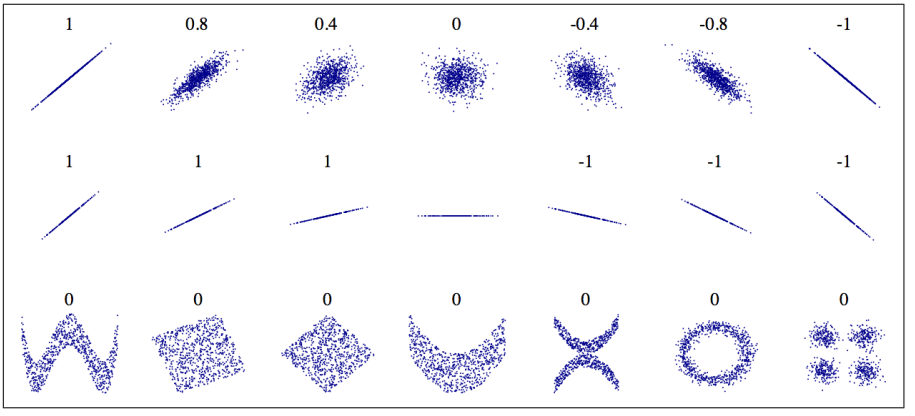


It'll return a correlation matrix (panda's dataframe) between every pair of attributes:

In [24]:
import seaborn as sns

In [25]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [26]:
corr_matrix["median_house_value"]

longitude            -0.047466
latitude             -0.142673
housing_median_age    0.114146
total_rooms           0.135140
total_bedrooms        0.047781
population           -0.026882
households            0.064590
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

# Heat Map

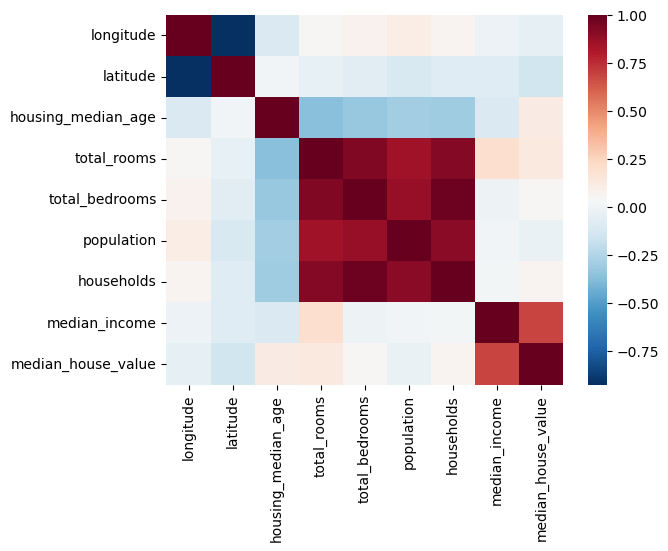

In [27]:
sns.heatmap(corr_matrix, cmap="RdBu_r")
plt.show()

## 🔷 Scatter Matrix 

A scatter matrix plots every numerical attribute against every other numerical attribute. 
* Remember to consider the total number of attributes, in this case it'll be $11^2 = 121$ plots, which would not fit - so **filter**. 

<Figure size 400x400 with 0 Axes>

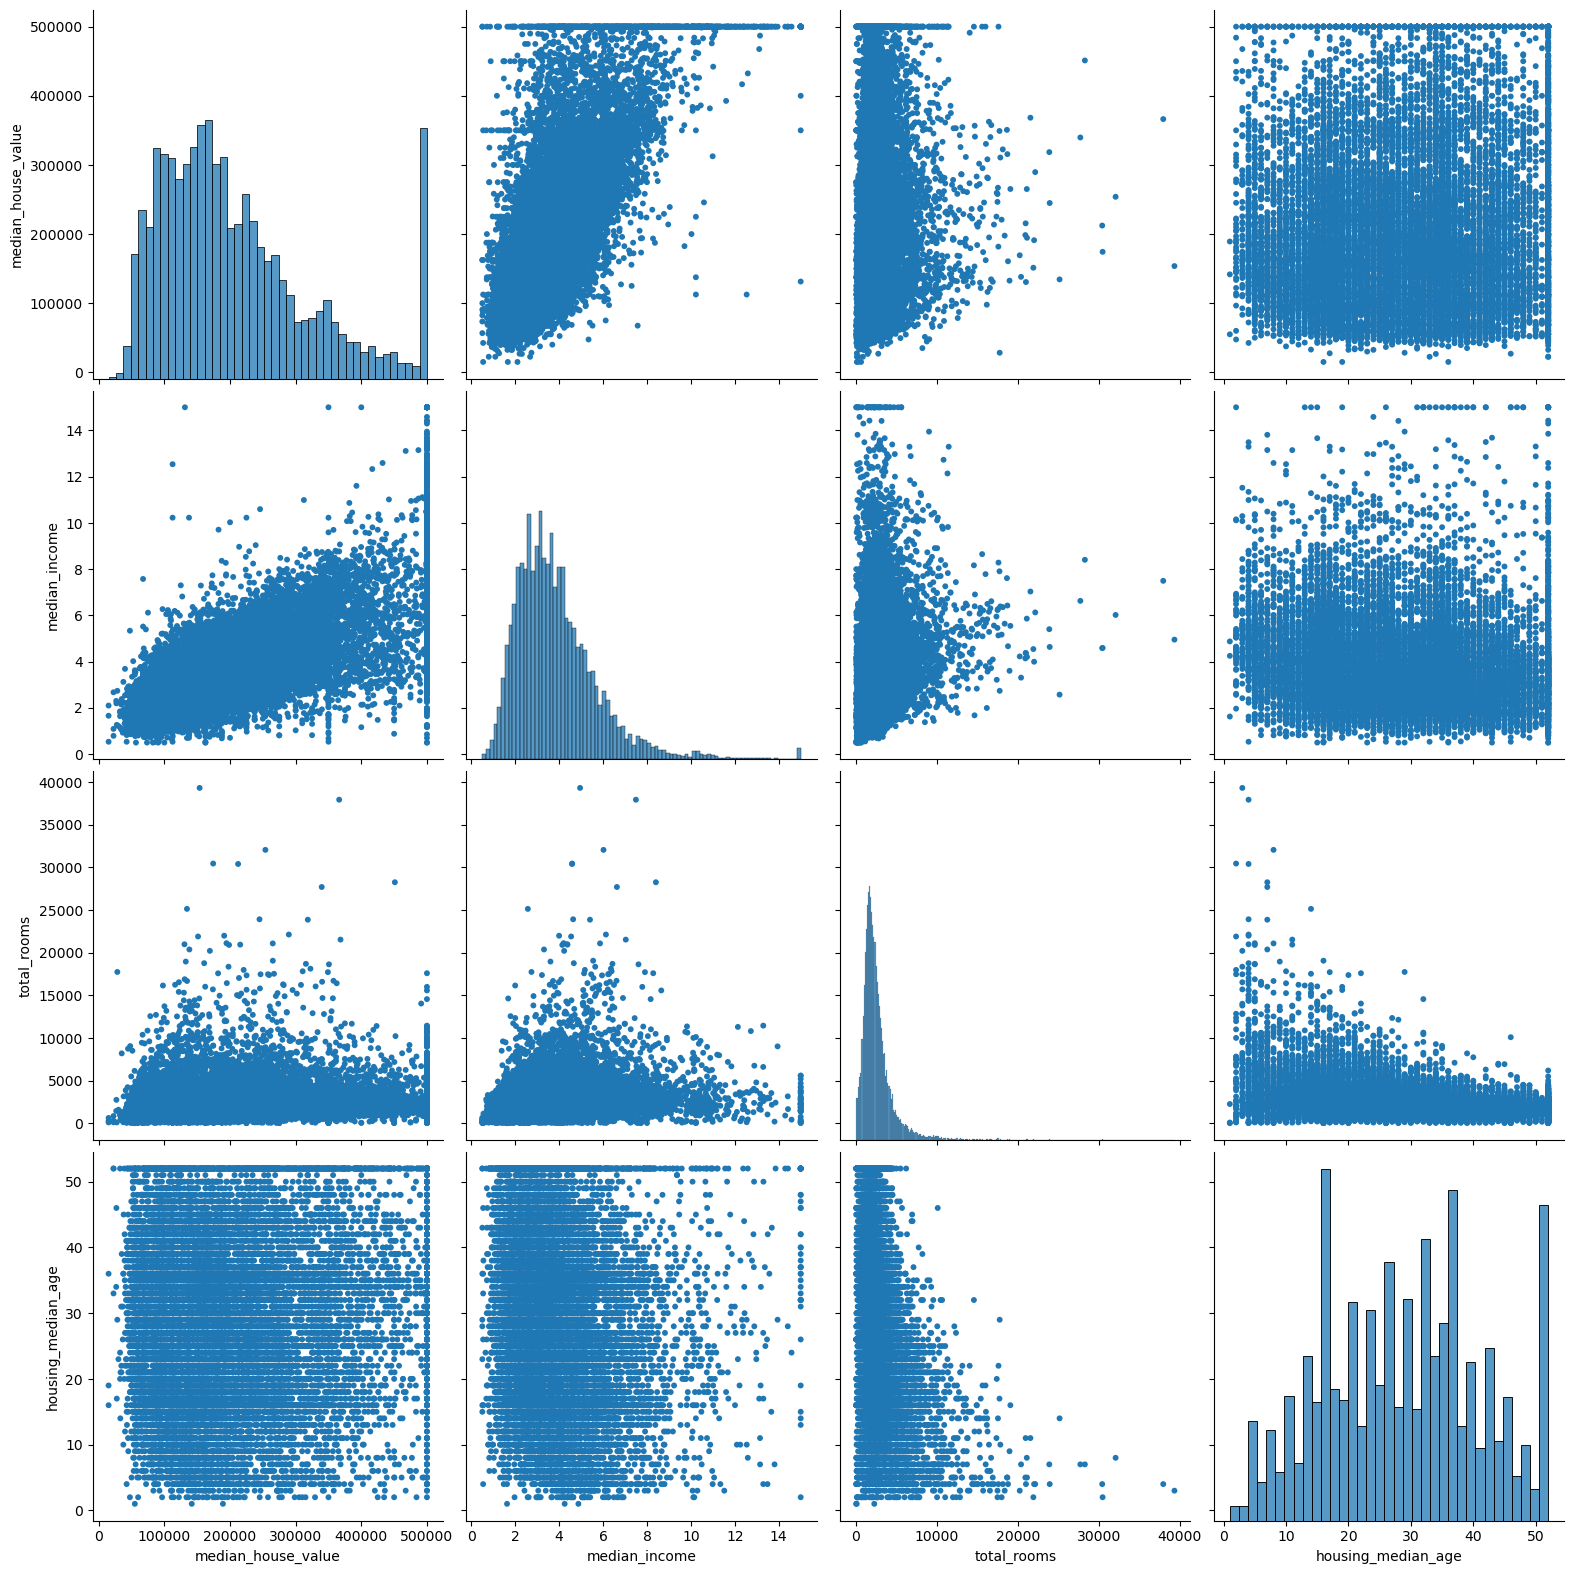

In [28]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

plt.figure(figsize=(4,4))

sns.pairplot(housing[attributes], plot_kws={"linewidth":0, "size":0.01}, height=4)
plt.show()

From that, we can see that the only attribute that is promising to predict the **median house value** is the **median income**. Let's analyze their relation more closely:

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

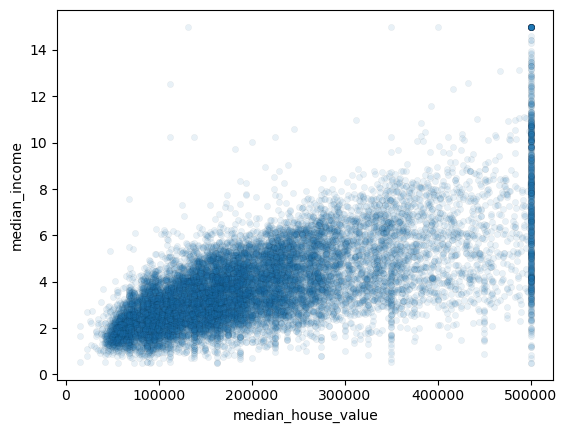

In [29]:
housing.plot(x="median_house_value", y="median_income", kind="scatter", linewidth=0.2, edgecolors="black", alpha=0.1)

#### This reveals a few things:
1. Their correlation is very strong 
2. The price cap of, 500000 is clearly visible as a vertical straight line
3. Vertical straight lines at around $450,000 and $350,000 and $280,000 that are outliers (referred only to that specific districts)
	* **It's interesting to remove the corresponding districts to prevent the algorithm from learning to reproduce this data quirks**. 

# 🔵 Combination of Attributes

## 🔷 Experiment With Attribute Combinations
This is the time to try to think of interesting attribute combination - they can revel interesting and surprising relations between the variables.

For this project, the chosen attributes were:

In [30]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

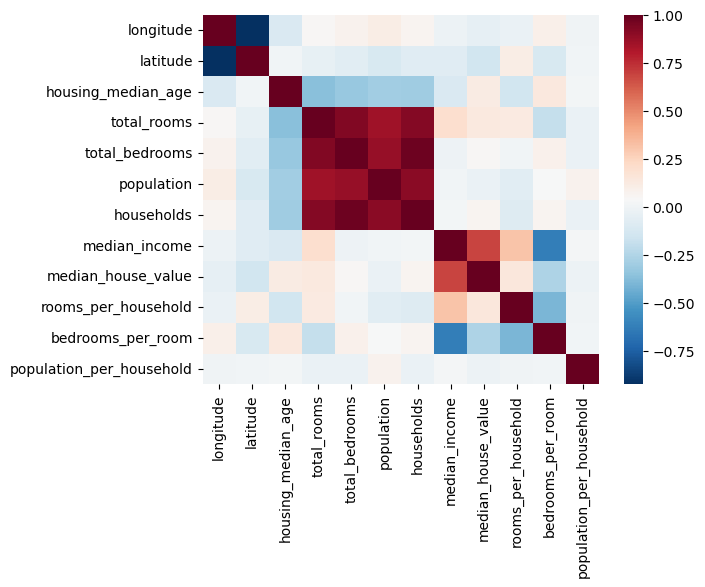

In [31]:
corr_matrix = housing.corr()
sns.heatmap(corr_matrix, cmap="RdBu_r");

In [32]:
corr_matrix["bedrooms_per_room"]

longitude                   0.095645
latitude                   -0.116955
housing_median_age          0.136768
total_rooms                -0.192655
total_bedrooms              0.086883
population                  0.037736
households                  0.067090
median_income              -0.624650
median_house_value         -0.259952
rooms_per_household        -0.398529
bedrooms_per_room           1.000000
population_per_household    0.004284
Name: bedrooms_per_room, dtype: float64

Where we can see the two interesting correlations with the variable `bedrooms_per_room`:

* `median_income`: This relation is not very useful, since we want correlations with the study variable
* ❗ `median_house_value`: This show as light negative correlation - which is very useful. Meaning that, apparently, the median house value increases as the number of bedrooms_per_room decreases. 

# 🔵 Prepare the Data

We'll use housing as the training features and housing_labels will be used for the supervised learning

In [33]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## 🔷 Data Cleaning

### 🔹 Removing Missing Values - Numerical Data
ML algorithms can't work with missing values, thus we must do something with them. The option are:
1. Get rid of the corresponding districts (the whole row)
2. Get rid of the whole attribute (column)
3. Set the missing values to some value (zero, the mean, the median, etc.)

In [34]:
# 1. Manual Way (single attribute at a time)

housing.dropna(subset=['total_bedrooms'])   # option 1
housing.drop("total_bedrooms", axis=1)      # option 2

median = housing["total_bedrooms"].mean()
housing["total_bedrooms"].fillna(median, inplace=True)  # option 3
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [35]:
# 2. Automated / future proof way (all attributes at once)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

display(imputer.statistics_)
display(housing_num.median().values)

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)
housing_tr.info()

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  436.     ,
       1164.     ,  408.     ,    3.54155])

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  436.     ,
       1164.     ,  408.     ,    3.54155])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [36]:
housing_cat = housing[["ocean_proximity"]]    # this creates an pandas dataframe instead of a series
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


### 🔹 Handling Text and Categorical Attributes
There are two major ways of handling text and categorical data.

#### 🔸 Ordinal Encoder 


In [37]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(housing_cat)[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

**❗ PROBLEM:** This type of transformation assumes a proximity by the order of the categories - meaning that - 0 is closer to 1 than to 4. 
* It is a good method in 'bad', 'medium', 'good', 'excellent' cases. 
* This is not always true, for example in this case, `<1H OCEAN` (0) is closer to `NEAR OCEAN` (4) than `INLAND` (1).
* Clearly this is not the best option in this case

### 🔸 One Hot Encoder

To fix the problem mentioned above, we can create one binary attribute column per category. One attribute will be equal to 1 (hot) while the others will be 0 (cold).

Scikit-Learn provides an One Hot Encoder class:

In [38]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# 🔵 Custom Transoformers

In [41]:
housing.values[:, 3]

array([3873.0, 5320.0, 1618.0, ..., 707.0, 3155.0, 1079.0], dtype=object)

In [42]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [43]:
housing["latitude"]

12655    38.52
15502    33.09
2908     35.37
14053    32.75
20496    34.28
         ...  
15174    33.03
12661    38.51
19263    38.44
19140    38.31
19773    39.97
Name: latitude, Length: 16512, dtype: float64

In [44]:
np.c_[housing["latitude"]]

array([[38.52],
       [33.09],
       [35.37],
       ...,
       [38.44],
       [38.31],
       [39.97]])

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self    # nothing else to do
    
    
    # We're using X[:, :] notation - 2D array notation because it's scikit-learn's notation
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing.values)
pd.DataFrame(housing_extra_attribs, columns=list(housing.columns) + ["rooms_per_household", "population_per_household", "bedrooms_per_room"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555,0.205784
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698,0.160714
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333,0.191595
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213,0.276505
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241,0.182692
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.09,<1H OCEAN,6.658342,2.023976,0.184696
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,5.571932,3.363188,0.179977
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,4.110465,2.662791,0.234795
16510,-122.7,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,6.297405,2.411178,0.183835


In [46]:
np.c_[housing]

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

In [47]:
housing.values

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

# 🔵 Feature Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max = MinMaxScaler()
std_scaler = StandardScaler()

display(pd.DataFrame(min_max.fit_transform(housing_tr), columns = housing_tr.columns))  # Normalization
pd.DataFrame(std_scaler.fit_transform(housing_tr), columns = housing_tr.columns)        # Standardization 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617
...,...,...,...,...,...,...,...,...
16507,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554
16508,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584
16509,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811
16510,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.941350,1.347438,0.027564,0.584777,0.638183,0.732602,0.556286,-0.893647
1,1.171782,-1.192440,-1.722018,1.261467,0.779415,0.533612,0.721318,1.292168
2,0.267581,-0.125972,1.220460,-0.469773,-0.547672,-0.674675,-0.524407,-0.525434
3,1.221738,-1.351474,-0.370069,-0.348652,-0.038752,-0.467617,-0.037297,-0.865929
4,0.437431,-0.635818,-0.131489,0.427179,0.270495,0.374060,0.220898,0.325752
...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.694983,0.543471,1.341519,0.637374
16508,-0.921368,1.342761,-1.085806,2.468471,2.160072,3.002174,2.451492,-0.557509
16509,-1.570794,1.310018,1.538566,-0.895802,-0.898315,-0.862013,-0.865118,-0.365475
16510,-1.560803,1.249211,-1.165333,0.249005,0.109784,-0.189747,0.010616,0.168261


# 🔵 Transformation Pipelines

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12236839],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.76455102],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.32454514],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.29100658],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.43510673],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.1229037 ]])

In [50]:
housing = strat_train_set.copy()

In [51]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# - - - Começo- - -

# 🔵 Training and Evaluting the Models

Não iremos entrar em muitos detalhes no funcionamento de cada modelo, pois no futuro, o livro irá abordar melhor como cada um funciona e também pretedendo implementar aqueles que o livro não fizer. 

## 🔷 Linear Model

In [52]:
from sklearn.linear_model import LinearRegression

X = housing_prepared
y = housing_labels

lin_reg = LinearRegression()
lin_reg.fit(X, y)

some_data = housing.iloc[:2500]
some_labels = housing_labels.iloc[:2500]
some_data_prepared = full_pipeline.fit_transform(some_data)

print("Predicions: ", lin_reg.predict(some_data_prepared)[0:5])
print("Labels: ", list(some_labels)[0:5])

Predicions:  [ 84691.1549524  306172.6366809  151205.09294488 187025.35737843
 245148.41681228]
Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [53]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

# 🔷 Decision Trees

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_reg_mse = mean_squared_error(housing_labels, housing_predictions)
tree_reg_rmse = np.sqrt(tree_reg_mse)
tree_reg_rmse

# Clearly overfitting the data

0.0

## 🔷 Cross Validation

Aqui utilizar o método de Cross-Validation para avaliar os modelos.

Como já dito em apresentações anteriores, ele divide o conjunto de dados em **cv** partes iguais. O algoritmo será executado **cv** vezes, a cada vez um sub conjunto de tamanho

$$\frac{\text{Quantidade de Dados}}{cv}$$

será atribuído para teste e os demais atribuídos para treino. A cada iteração o conjunto de teste muda. 
* Os elementos de cada conjunto são escolhidos de forma aleatória, para evitar padrões não existentes. 


In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
# display(scores)
tree_reg_rmse_scores = np.sqrt(-scores)
tree_reg_rmse_scores

# It's worse than the linear regression model

array([72769.52707516, 69724.46087095, 67824.42307905, 71156.13468886,
       69184.9132356 , 77102.26470466, 70093.71798496, 73161.31156086,
       68944.93549746, 70948.34272018])

In [56]:
tree_reg_rmse_scores.mean()

71432.52332065887

In [57]:
def display_scores(scores):
	print("Scores: ", scores)
	print("Mean: ", scores.mean())
	print("Standard Deviation: ", scores.std())

display_scores(tree_reg_rmse_scores)

Scores:  [72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
Mean:  71432.52332065887
Standard Deviation:  2696.6824522410743


In [58]:
# Comparing with the linear model

scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

# The linear model performs better than the deicision tree (that is badly overfitting)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Deviation:  2880.3282098180657


## 🔷 Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_reg_mse = mean_squared_error(housing_labels, housing_predictions)
forest_reg_rmse = np.sqrt(forest_reg_mse)
forest_reg_rmse

18733.78842762556

In [60]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=4)
forest_reg_rmse_scores = np.sqrt(-scores)
display_scores(forest_reg_rmse_scores)

# Random Forest is the best so far!

Scores:  [50027.97369175 50371.69516639 52260.17020122 51723.33467856]
Mean:  51095.793434480605
Standard Deviation:  923.8693864325115


# 🔵 Fine-Tuning the Model

## 🔷 Grid Search

In [61]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [64]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [65]:
grid_search.n_features_in_

16

In [66]:
cvres = grid_search.cv_results_
for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_test_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

# 🔵 Full Pipeline

We need to apply theone hot enconder first because it'll split the categorical data accordingly to the avalaible data in the subset. Sometimes it happens that the grid search cv takes a subset where one of the categories is not present, and that makes a problem, when it compares to the geral expected 

In [67]:
housing = strat_train_set.copy()

Preparing the data and build pipelines

In [68]:
housing_ready = housing.copy()
housing_ready.drop("median_house_value", axis=1, inplace=True)

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # fixing missing values
    ("attribs_adder", CombinedAttributesAdder()),    # Adding the combined features
    ("std_scaler", StandardScaler())                 # Fixing the features' scales
])

cat_attribs = list(housing["ocean_proximity"].unique())     # categorical attributes
num_attribs = [x for x in housing_ready.columns if x not in cat_attribs]
num_attribs.remove("ocean_proximity")


display(cat_attribs, num_attribs)

one_hot_encoder = OneHotEncoder()
transformed = one_hot_encoder.fit_transform(housing_ready[["ocean_proximity"]])


housing_ready[one_hot_encoder.categories_[0]] = transformed.toarray()
housing_ready.drop("ocean_proximity", axis=1, inplace=True)
display(housing_ready)

transformation_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", "passthrough", cat_attribs)
])

forest_reg = RandomForestRegressor(random_state=42)

forest_pipeline = Pipeline([
    ("transformation", transformation_pipeline),
    ("model", forest_reg)
])

['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND']

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0.0,1.0,0.0,0.0,0.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,0.0,1.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0.0,1.0,0.0,0.0,0.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,0.0,1.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.0,0.0,0.0,0.0,0.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,0.0,1.0,0.0,0.0,0.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,1.0,0.0,0.0,0.0,0.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.0,0.0,0.0,0.0,0.0


In [69]:
param_grid = [
    {"model__n_estimators": [3, 10, 30], 'model__max_features': [2, 4, 6, 8], "transformation__num__attribs_adder__add_bedrooms_per_room": [False, True]},
    {'model__bootstrap': [False], 'model__n_estimators': [10, 30], 'model__max_features': [4, 6, 8], "transformation__num__attribs_adder__add_bedrooms_per_room": [False, True]}
]

grid_search = GridSearchCV(forest_pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_ready, housing_labels)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
    

In [70]:
grid_search.n_features_in_

13

In [71]:
grid_search.best_params_

{'model__bootstrap': False,
 'model__max_features': 6,
 'model__n_estimators': 30,
 'transformation__num__attribs_adder__add_bedrooms_per_room': False}

In [72]:
grid_search.best_estimator_

Pipeline(steps=[('transformation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder(add_bedrooms_per_room=False)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'hou

In [73]:
cvres = grid_search.cv_results_
for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_test_score), params)

63575.9739672717 {'model__max_features': 2, 'model__n_estimators': 3, 'transformation__num__attribs_adder__add_bedrooms_per_room': False}
63456.90346060413 {'model__max_features': 2, 'model__n_estimators': 3, 'transformation__num__attribs_adder__add_bedrooms_per_room': True}
55934.295008652516 {'model__max_features': 2, 'model__n_estimators': 10, 'transformation__num__attribs_adder__add_bedrooms_per_room': False}
55323.54706863361 {'model__max_features': 2, 'model__n_estimators': 10, 'transformation__num__attribs_adder__add_bedrooms_per_room': True}
52528.2390678022 {'model__max_features': 2, 'model__n_estimators': 30, 'transformation__num__attribs_adder__add_bedrooms_per_room': False}
52729.72782947599 {'model__max_features': 2, 'model__n_estimators': 30, 'transformation__num__attribs_adder__add_bedrooms_per_room': True}
58874.541629771884 {'model__max_features': 4, 'model__n_estimators': 3, 'transformation__num__attribs_adder__add_bedrooms_per_room': False}
61037.04836711251 {'model_

In [74]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(forest_pipeline, param_grid, n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state=42)

random_search.fit(housing_ready, housing_labels)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformation',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('attribs_adder',
                                                                                                CombinedAttributesAdder()),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               ['longitude',
                              

In [75]:
np.sqrt(-random_search.best_score_)

48754.538161576456

## 🔵 Analysing Errors

In [76]:
feature_importance = grid_search.best_estimator_["model"].feature_importances_
feature_importance

array([9.44061784e-02, 8.20582451e-02, 4.21017352e-02, 2.05395059e-02,
       1.73313504e-02, 1.80617969e-02, 1.70766895e-02, 3.44823915e-01,
       8.05803261e-02, 1.07391211e-01, 1.51587953e-01, 5.58190691e-03,
       1.49927674e-02, 3.39925169e-03, 6.71677153e-05])

In [77]:
grid_search.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [78]:
extra_attribs = ["rooms_per_household", "population_per_household"]
attributes = num_attribs + extra_attribs + cat_attribs
display(attributes)
sorted(zip(feature_importance, attributes), reverse=True)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'INLAND',
 'NEAR OCEAN',
 '<1H OCEAN',
 'NEAR BAY',
 'ISLAND']

[(0.34482391508682153, 'median_income'),
 (0.1515879527764417, 'INLAND'),
 (0.10739121090518218, 'population_per_household'),
 (0.09440617844154443, 'longitude'),
 (0.08205824514845324, 'latitude'),
 (0.08058032607131681, 'rooms_per_household'),
 (0.04210173519720787, 'housing_median_age'),
 (0.02053950588533712, 'total_rooms'),
 (0.018061796850285198, 'population'),
 (0.01733135041263873, 'total_bedrooms'),
 (0.017076689538911734, 'households'),
 (0.014992767372451374, '<1H OCEAN'),
 (0.0055819069118268425, 'NEAR OCEAN'),
 (0.0033992516863064616, 'NEAR BAY'),
 (6.716771527477114e-05, 'ISLAND')]

# 🔵 Test Set

In [79]:
final_model = random_search.best_estimator_["model"]

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = X_test.copy()
# X_test_prepared.drop("ocean_proximity", axis=1, inplace=True)

one_hot_encoder = OneHotEncoder()
transformed = one_hot_encoder.fit_transform(X_test_prepared[["ocean_proximity"]])

X_test_prepared[one_hot_encoder.categories_[0]] = transformed.toarray()
X_test_prepared.drop("ocean_proximity", axis=1, inplace=True)

t_pipeline = transformation_pipeline.set_params(num__attribs_adder__add_bedrooms_per_room=False)
X_test_prepared = t_pipeline.fit_transform(X_test_prepared)

final_predictions = final_model.predict(X_test_prepared)

final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_rmse

# The error is too big, it's overfitting the model. The problem is on the hyperparameter tunning phase

66737.23934163355

In [80]:
# Confidence Interval

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([64720.10385853, 68695.1700371 ])